In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
xls = pd.ExcelFile(r"C:\Users\Akshaj Kabthiyal\Desktop\KPMG Intern\1 Data Quality Assessment\KPMG_VI_New_raw_data_update_final.xlsx")
pd4 = pd.read_excel(xls, sheet_name=4, header=1)

In [7]:
df4 = pd.DataFrame(pd4)

In [8]:
# check out datatypes, columns name, counts
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [10]:
# check the first 5 records
df4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
# check for null values
df4.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [12]:
# check that the customer id is unique
pd.Series(df4['customer_id']).is_unique

True

In [13]:
# check there are no duplicate properties
df4.duplicated(subset=['address', 'postcode'], keep='first').value_counts()

False    3999
dtype: int64

In [14]:
# show the frequency of different postcodes
df2['postcode'].value_counts()

In [14]:
# make sure the ID only contain legitimate digits
df4['customer_id'] = df4['customer_id'].astype('int64')

In [15]:
# show the frequency of different states
df4['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [16]:
# replace all the misspelt or differently formatted data
df4['state'].replace({'New South Wales' : 'NSW', 'Victoria' : 'VIC'}, inplace=True)

In [18]:
# show the frequency of country to which the property belong to
df4['country'].value_counts()

NameError: name 'df2' is not defined

Text(0, 0.5, 'property valuation')

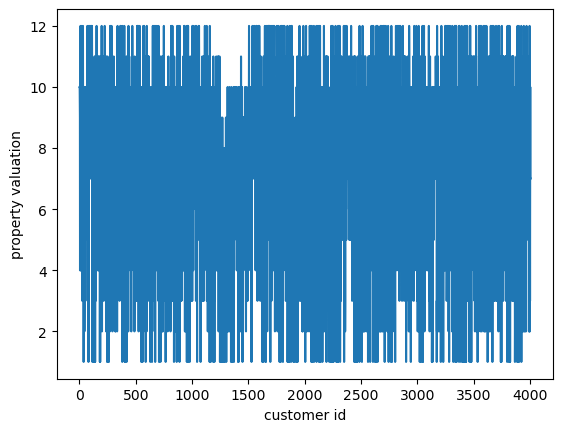

In [19]:
# visualise the valuation prices of properties
x = df4['customer_id']
y = df4['property_valuation']

plt.plot(x, y)
plt.xlabel('customer id')
plt.ylabel('property valuation')

In [20]:
# checking that the column names are in the correct format
df4.columns = map(str.lower, df4.columns)
df4.columns = map(str.strip, df4.columns)

In [21]:
df4

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [22]:
#check the dataset after cleaning
df2.info()

In [24]:
# make sure all dates are in the correct format
df3['DOB'] = df3['DOB'].dt.date

In [25]:
# convert to boolean data type
f = {'N': False, 'Y': True}
df3['deceased_indicator'] = df3['deceased_indicator'].map(f).fillna(df3['deceased_indicator'])

In [26]:
# convert to boolean data type
g = {'No': False, 'Yes': True}
df3['owns_car'] = df3['owns_car'].map(g).fillna(df3['owns_car'])

In [27]:
# calculate the median value for tenure
np.nanmedian(df3['tenure'])

11.0

In [28]:
# filling in the missing value for tenure
df3['tenure'].fillna(value = 11.0, inplace = True)

In [30]:
# make sure that the column names are in the correct format
df3.columns = map(str.lower, df3.columns)
df3.columns = map(str.strip, df3.columns)

In [32]:
#check the dataset after cleaning
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          4000 non-null   int64   
 1   first_name                           4000 non-null   object  
 2   last_name                            3875 non-null   object  
 3   gender                               4000 non-null   category
 4   past_3_years_bike_related_purchases  4000 non-null   int64   
 5   dob                                  3913 non-null   object  
 6   job_title                            4000 non-null   object  
 7   job_industry_category                4000 non-null   object  
 8   wealth_segment                       4000 non-null   object  
 9   deceased_indicator                   4000 non-null   bool    
 10  owns_car                             4000 non-null   bool    
 11  tenure           

In [34]:
df3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,True,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,False,True,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,False,True,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,False,False,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,False,True,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,False,False,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,False,True,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,False,False,11.0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,Software Engineer IV,Manufacturing,Affluent Customer,False,True,10.0


In [35]:
#print to csv file after the cleaning
df3.to_csv('./data3_cleaned.csv',index=False)